In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = "https://raw.githubusercontent.com/aniruddha7599/DAIICT-/refs/heads/main/NAFLD%20EDA.csv"
data = pd.read_csv(data_url)

In [33]:
# Display the first few rows of the dataset
print(data.head())

        Age  Height (cm)  Weight (kg)  Body Mass Index  \
0  1.287682    -1.492160    -0.448911         0.763847   
1  0.817640    -1.088605    -0.944812        -0.211064   
2  0.629623     0.525618     1.038792         0.639434   
3 -1.250545     1.030063     0.613734        -0.162115   
4 -2.190629    -0.281493    -1.299027        -1.204332   

   Waist Circumference (cm)  Hip Circumference (cm)  \
0                  0.969543               -0.026145   
1                 -0.844825               -0.618139   
2                  0.667148                0.763179   
3                  0.465552                0.960510   
4                 -0.844825               -0.716804   

   Gender (Female=0, Male=1)  Diabetes (No=0, Yes=1)  \
0                          0                       0   
1                          0                       0   
2                          1                       1   
3                          1                       1   
4                          1            

In [34]:
# Define input and output variables
X = data.drop(columns=["Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"])
y = data["Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"]

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Make predictions
y_pred = model.predict(X_test)

In [38]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [39]:
# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6868
Precision: 0.7134
Recall: 0.9032
F1 Score: 0.7972


In [40]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6868131868131868
Precision: 0.7133757961783439
Recall: 0.9032258064516129
F1 Score: 0.797153024911032
Confusion Matrix:
 [[ 13  45]
 [ 12 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.22      0.31        58
           1       0.71      0.90      0.80       124

    accuracy                           0.69       182
   macro avg       0.62      0.56      0.56       182
weighted avg       0.65      0.69      0.64       182



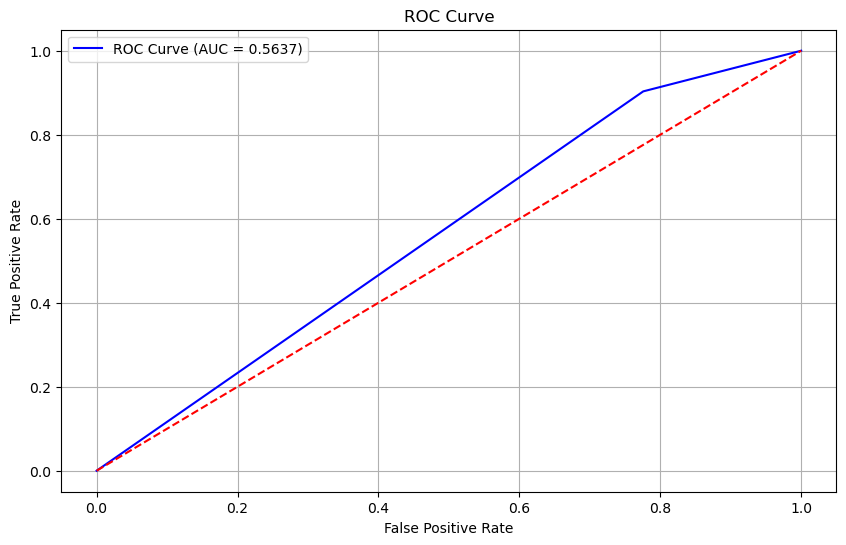

In [41]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

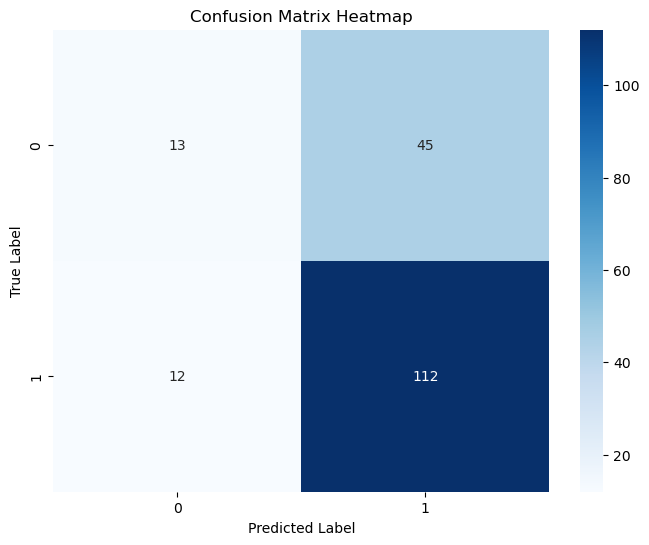

In [42]:
# Confusion matrix and heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()